In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
np.array2string(np.arange(12), precision=2, threshold=6, edgeitems=3)

'[ 0  1  2 ...  9 10 11]'

In [7]:
g.grid

Grid(
Axis("x",
points = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
edges = edges: None)
nbins = 10),)

In [8]:
g['b'] = np.arange(30).reshape(10,-1)

In [9]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [10]:
g.flat('b')

masked_array(
  data=[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]],
  mask=False,
  fill_value=999999)

In [11]:
g.grid.size

10

In [12]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [13]:
g['b'].ndim

2

In [14]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [15]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [16]:
g.grid.vars

['x', 'y']

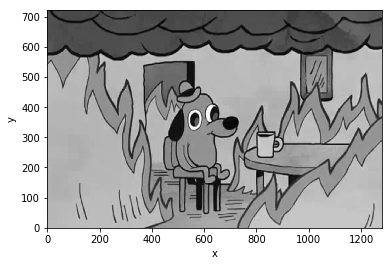

In [17]:
g.plot('bw', cmap='gray')

In [21]:
g.shape[3:]

()

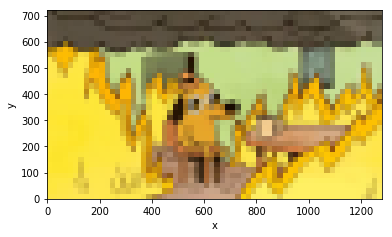

In [24]:
g.binwise(function=np.mean, x=0.05, y=0.05).plot('img')

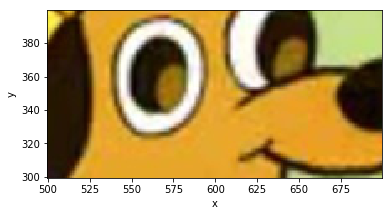

In [25]:
g[500:700, 300:400].plot('img')

AttributeError: module 'pynocular.translations' has no attribute 'Lookup'

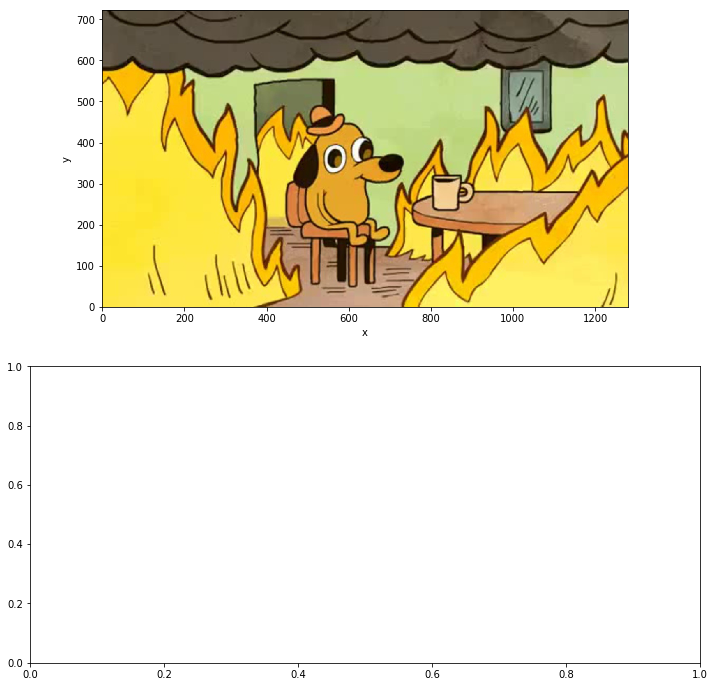

In [26]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges.max(), y=np.random.rand(N)*g.grid['y'].edges.max())
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

In [25]:
g.lookup(pd)

x,617,155,736,705,58,32.5,...,350,496,574,375,263,736
y,188,346,119,573,150,129,...,369,274,499,207,575,634
bw,0.506,0.706,0.544,0.731,0.689,0.689,...,0.719,0.144,0.722,0.499,0.295,0.318
img,[0.718 0.573 0.227],[0.996 0.906 0.216],[0.698 0.51 0.424],[0.78 0.875 0.537],[0.992 0.898 0.176],[0.992 0.898 0.176],...,[0.776 0.843 0.537],[0.298 0.129 0.004],[0.765 0.863 0.537],[0.812 0.62 0.067],[0.341 0.306 0.239],[0.373 0.322 0.259]


In [26]:
g.vars

['x', 'y', 'bw', 'img']

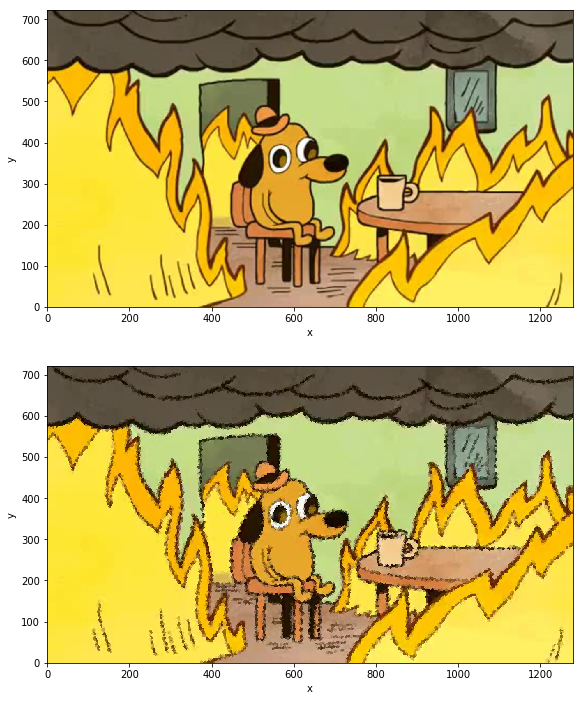

In [37]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=50000
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges.max()
pd['y'] = np.random.rand(N)*g.grid['y'].edges.max()
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


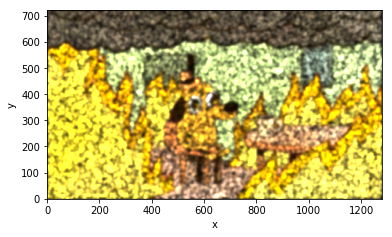

In [33]:
pk = pd.kde(x=1000, y=1000, bw=5, density=False, kernel='gaussian')
pk['img'] /= np.max(pk['img']) / 2
#pk['img_exp'] = np.exp(pk['img'])
#pk['img_exp'] /= np.max(pk['img_exp'])
pk.plot('img')



In [34]:
pk

y \ x,[0.01 1.29],[1.29 2.57],[2.57 3.85],[3.85 5.13],[5.13 6.41],[6.41 7.69],...,[1271.8 1273.08],[1273.08 1274.36],[1274.36 1275.64],[1275.64 1276.92],[1276.92 1278.2 ],[1278.2 1279.48]
[0.01 0.73],bw = 0.012img = [0.33 0.3 0.09]counts = 0.017,bw = 0.013img = [0.36 0.32 0.1 ]counts = 0.019,bw = 0.014img = [0.37 0.34 0.1 ]counts = 0.019,bw = 0.014img = [0.37 0.34 0.1 ]counts = 0.019,bw = 0.014img = [0.36 0.33 0.1 ]counts = 0.019,bw = 0.013img = [0.35 0.31 0.1 ]counts = 0.018,...,bw = 0.009img = [0.23 0.21 0.09]counts = 0.012,bw = 0.0073img = [0.18 0.17 0.07]counts = 0.0094,bw = 0.0056img = [0.14 0.13 0.05]counts = 0.0073,bw = 0.0041img = [0.1 0.1 0.04]counts = 0.0054,bw = 0.0029img = [0.07 0.07 0.03]counts = 0.0038,bw = 0.0019img = [0.05 0.05 0.02]counts = 0.0025
[0.73 1.45],bw = 0.014img = [0.39 0.35 0.11]counts = 0.02,bw = 0.016img = [0.42 0.38 0.12]counts = 0.022,bw = 0.016img = [0.44 0.4 0.12]counts = 0.023,bw = 0.016img = [0.44 0.4 0.12]counts = 0.023,bw = 0.016img = [0.43 0.39 0.12]counts = 0.022,bw = 0.015img = [0.41 0.37 0.11]counts = 0.021,...,bw = 0.011img = [0.26 0.25 0.1 ]counts = 0.014,bw = 0.0086img = [0.21 0.2 0.08]counts = 0.011,bw = 0.0067img = [0.17 0.16 0.06]counts = 0.0086,bw = 0.0049img = [0.12 0.12 0.05]counts = 0.0064,bw = 0.0035img = [0.09 0.08 0.03]counts = 0.0045,bw = 0.0023img = [0.06 0.06 0.02]counts = 0.003
[1.45 2.17],bw = 0.017img = [0.45 0.41 0.12]counts = 0.023,bw = 0.018img = [0.49 0.44 0.13]counts = 0.025,bw = 0.019img = [0.51 0.46 0.14]counts = 0.026,bw = 0.019img = [0.51 0.46 0.14]counts = 0.026,bw = 0.018img = [0.49 0.45 0.14]counts = 0.025,bw = 0.018img = [0.47 0.43 0.13]counts = 0.024,...,bw = 0.012img = [0.3 0.29 0.12]counts = 0.016,bw = 0.0099img = [0.25 0.24 0.09]counts = 0.013,bw = 0.0078img = [0.2 0.18 0.07]counts = 0.01,bw = 0.0058img = [0.15 0.14 0.06]counts = 0.0075,bw = 0.0041img = [0.1 0.1 0.04]counts = 0.0053,bw = 0.0028img = [0.07 0.07 0.03]counts = 0.0036
[2.17 2.89],bw = 0.019img = [0.51 0.46 0.14]counts = 0.026,bw = 0.021img = [0.56 0.5 0.15]counts = 0.029,bw = 0.022img = [0.58 0.52 0.16]counts = 0.03,bw = 0.022img = [0.58 0.52 0.16]counts = 0.03,bw = 0.021img = [0.56 0.51 0.16]counts = 0.029,bw = 0.02img = [0.54 0.49 0.15]counts = 0.028,...,bw = 0.014img = [0.35 0.33 0.13]counts = 0.018,bw = 0.011img = [0.28 0.27 0.11]counts = 0.015,bw = 0.0089img = [0.22 0.21 0.09]counts = 0.012,bw = 0.0067img = [0.17 0.16 0.06]counts = 0.0087,bw = 0.0048img = [0.12 0.11 0.05]counts = 0.0062,bw = 0.0033img = [0.08 0.08 0.03]counts = 0.0042
[2.89 3.61],bw = 0.022img = [0.58 0.52 0.16]counts = 0.03,bw = 0.023img = [0.63 0.57 0.17]counts = 0.032,bw = 0.024img = [0.65 0.59 0.18]counts = 0.034,bw = 0.024img = [0.65 0.59 0.18]counts = 0.034,bw = 0.024img = [0.63 0.57 0.17]counts = 0.033,bw = 0.023img = [0.6 0.55 0.17]counts = 0.031,...,bw = 0.015img = [0.39 0.36 0.15]counts = 0.02,bw = 0.013img = [0.32 0.3 0.12]counts = 0.016,bw = 0.01img = [0.25 0.24 0.1 ]counts = 0.013,bw = 0.0076img = [0.19 0.18 0.07]counts = 0.0099,bw = 0.0055img = [0.14 0.13 0.05]counts = 0.0071,bw = 0.0038img = [0.09 0.09 0.04]counts = 0.0049
[3.61 4.33],bw = 0.024img = [0.64 0.58 0.18]counts = 0.033,bw = 0.026img = [0.7 0.63 0.19]counts = 0.036,bw = 0.027img = [0.72 0.65 0.2 ]counts = 0.037,bw = 0.027img = [0.72 0.65 0.2 ]counts = 0.037,bw = 0.026img = [0.7 0.63 0.19]counts = 0.036,bw = 0.025img = [0.67 0.61 0.18]counts = 0.035,...,bw = 0.017img = [0.42 0.4 0.16]counts = 0.022,bw = 0.014img = [0.35 0.33 0.13]counts = 0.018,bw = 0.011img = [0.28 0.27 0.11]counts = 0.015,bw = 0.0086img = [0.21 0.2 0.08]counts = 0.011,bw = 0.0062img = [0.16 0.15 0.06]counts = 0.008,bw = 0.0043img = [0.11 0.1 0.04]counts = 0.0055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
[717.17 717.89],bw = 0.0082img = [0.18 0.16 0.13]counts = 0.026,bw = 0.01img = [0.22 0.2 0.16]counts = 0.032,bw = 0.012img = [0.26 0.23 0.19]counts = 0.038,bw = 0.013img = [0.29 0.26 0.21]counts = 0.043,bw = 0.014img = [0.31 0.28 0.23]counts = 0.047,bw = 0.01

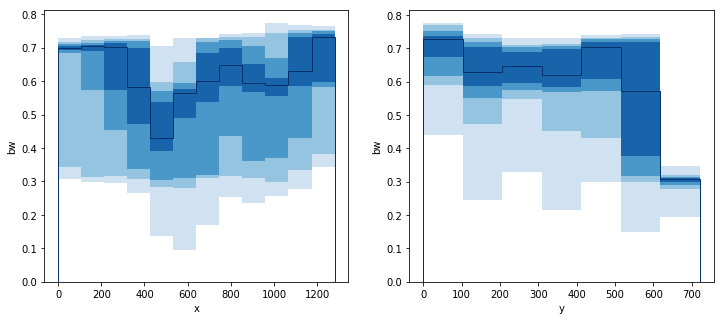

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

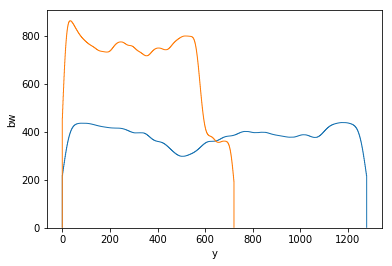

In [36]:
#g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde(x=1000, density=False).plot('bw')
g.kde(y=1000, density=False).plot('bw')

In [37]:
g['img'].shape

(1280, 722, 3)

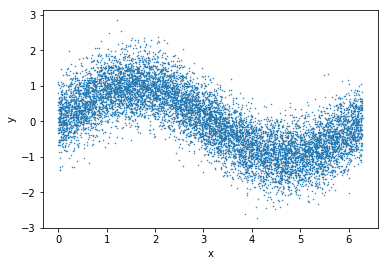

In [41]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(p.array_shape[0]) * 0.5
p.plot('.', ms=1)

In [42]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

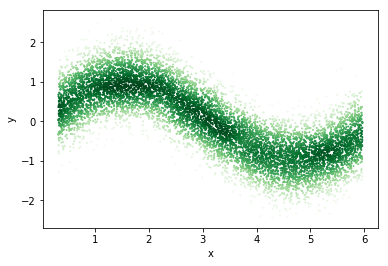

In [43]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


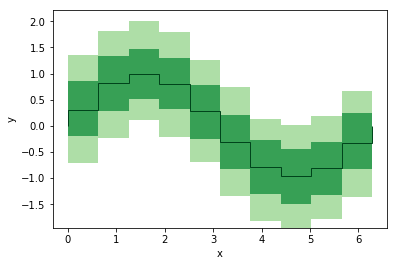

In [44]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

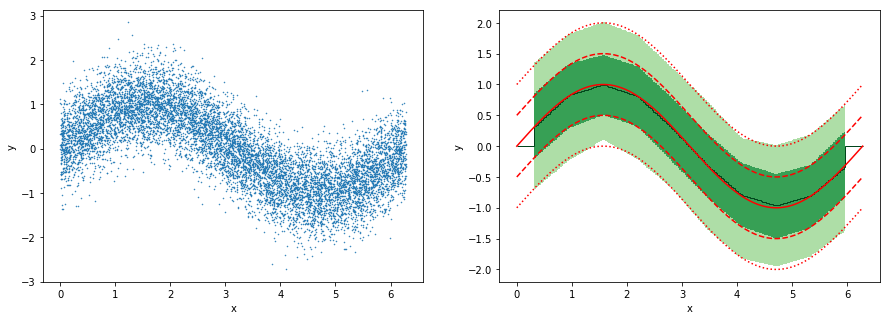

In [45]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='linear', fill_value=np.nan).plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

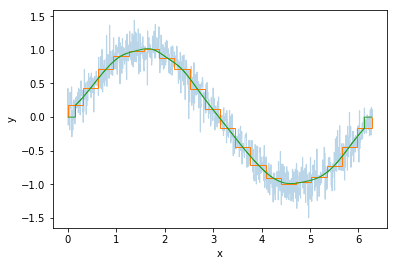

In [46]:
p.binwise(method='mean', x=1000).plot('y', alpha=0.3)
p.binwise(method='mean', x=20).plot('y')
p.binwise(method='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [47]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

needs to be checked, is weird behaviour
needs to be checked, is weird behaviour


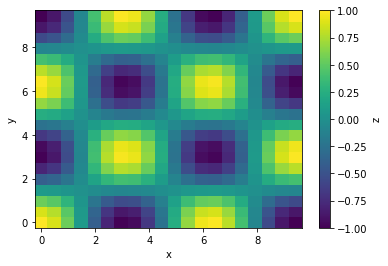

In [48]:
s.plot(cbar=True)

In [49]:
s['z']

y \ x,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
0,1,0.88,0.55,0.083,-0.4,-0.79,...,0.79,0.4,-0.083,-0.55,-0.88,-1
0.5,0.88,0.77,0.48,0.073,-0.35,-0.69,...,0.69,0.35,-0.073,-0.48,-0.77,-0.88
0.99,0.55,0.48,0.3,0.045,-0.22,-0.43,...,0.43,0.22,-0.045,-0.3,-0.48,-0.55
1.5,0.083,0.073,0.045,0.0068,-0.033,-0.065,...,0.065,0.033,-0.0068,-0.045,-0.073,-0.083
2,-0.4,-0.35,-0.22,-0.033,0.16,0.32,...,-0.32,-0.16,0.033,0.22,0.35,0.4
2.5,-0.79,-0.69,-0.43,-0.065,0.32,0.62,...,-0.62,-0.32,0.065,0.43,0.69,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.9,0.79,0.69,0.43,0.065,-0.32,-0.62,...,0.62,0.32,-0.065,-0.43,-0.69,-0.79
7.4,0.4,0.35,0.22,0.033,-0.16,-0.32,...,0.32,0.16,-0.033,-0.22,-0.35,-0.4
7.9,-0.083,-0.073,-0.045,-0.0068,0.033,0.065,...,-0.065,-0.033,0.0068,0.045,0.073,0.083


In [50]:
np.max(s['z'], axis='x')

y,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
,1,0.88,0.55,0.083,0.4,0.79,...,0.79,0.4,0.083,0.55,0.88,1


In [51]:
np.square(s['z'])

y \ x,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
0,1,0.77,0.3,0.0068,0.16,0.62,...,0.62,0.16,0.0068,0.3,0.77,1
0.5,0.77,0.6,0.23,0.0053,0.12,0.48,...,0.48,0.12,0.0053,0.23,0.6,0.77
0.99,0.3,0.23,0.089,0.002,0.048,0.19,...,0.19,0.048,0.002,0.089,0.23,0.3
1.5,0.0068,0.0053,0.002,4.7e-05,0.0011,0.0042,...,0.0042,0.0011,4.7e-05,0.002,0.0053,0.0068
2,0.16,0.12,0.048,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.048,0.12,0.16
2.5,0.62,0.48,0.19,0.0042,0.1,0.39,...,0.39,0.1,0.0042,0.19,0.48,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.9,0.62,0.48,0.19,0.0042,0.1,0.39,...,0.39,0.1,0.0042,0.19,0.48,0.62
7.4,0.16,0.12,0.048,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.048,0.12,0.16
7.9,0.0068,0.0053,0.002,4.7e-05,0.0011,0.0042,...,0.0042,0.0011,4.7e-05,0.002,0.0053,0.0068


In [52]:
np.sum(s['z'], axis='y')

x,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
,-5.6e-16,-6.7e-16,0,0,5.6e-17,7.8e-16,...,-2.2e-16,-2.2e-16,4.2e-17,4.4e-16,6.7e-16,5.6e-16


In [53]:
np.mean(s['z'], axis='x')

y,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
,-2.8e-17,-3.3e-17,0,-1.4e-18,1.4e-17,2.8e-17,...,-3.3e-17,0,3.5e-18,2.2e-17,3.3e-17,2.8e-17


In [54]:
s['z'].mean(axis='x')

y,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
,-2.8e-17,-3.3e-17,0,-1.4e-18,1.4e-17,2.8e-17,...,-3.3e-17,0,3.5e-18,2.2e-17,3.3e-17,2.8e-17


In [55]:
s['x']

y \ x,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
0,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
0.5,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
0.99,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
1.5,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
2,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
2.5,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.9,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
7.4,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4
7.9,0,0.5,0.99,1.5,2,2.5,...,6.9,7.4,7.9,8.4,8.9,9.4


In [59]:
test = pn.GridData()#x=[0,1,2], y=[0,1,2,3])

In [60]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

adding default grid


In [61]:
test

y \ x,0,1
0,a = 0b = 0,a = 3b = 0
1,a = 1b = 0,a = 4b = 0
2,a = 2b = 0,a = 5b = 0


In [62]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [63]:
test['a'].T

x \ y,0,1,2
0,0,1,2
1,3,4,5


In [64]:
np.mean(test['a'], axis='x')

y,0,1,2
,1.5,2.5,3.5


In [65]:
np.sum(test['b'], axis='x')

y,0,1,2
,0,0,0


In [66]:
np.square(test['a'])

y \ x,0,1
0,0,9
1,1,16
2,4,25


In [67]:
np.max(test['a'], axis='x')

y,0,1,2
,3,4,5


In [68]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [69]:
test['a'][test['x'] > 1]

y \ x,0,1
0,--,--
1,--,--
2,--,--


In [70]:
test.grid['x'].edges

edges: array([[-0.5,  0.5],
       [ 0.5,  1.5]])

In [71]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [72]:
test['a'][test['x'] >= test['y']] + test['a']

y \ x,0,1
0,0,6
1,--,8
2,--,--


In [73]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [74]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

y \ x,0,1
0,0,--
1,--,4
2,--,--


In [75]:
np.sum(test['a'][test['x'] == test['y']])

4

In [76]:
test['a'] + test['a'][test['a'] > 3] * 3.

y \ x,0,1
0,--,--
1,--,16
2,--,20


In [77]:
test['a'][test['a'] > 3] += test['a'][test['a'] > 4] 

In [78]:
test['a'] *= -1

In [79]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [80]:
test['a'][0,:] *= -1

In [84]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [85]:
(test['a'].data * 300)

array([[    0,  -300,  -600],
       [ -900, -1200, -3000]])

In [86]:
test['a'] ** 2

y \ x,0,1
0,0,9
1,1,16
2,4,1e+02


In [87]:
str(test['a'][0])
test['a'][0].shape
test['a'].ndim

2

In [88]:
test['a'].grid[0]

Grid(
Axis("y",
points = array([0, 1, 2]),
edges = edges: None)
nbins = 3),)

In [89]:
test['a'][0,[0]]

y,0
,0


In [90]:
test[0,0]

{'a': 0, 'b': 0}

In [91]:
test['a'].data[[0],[0],np.newaxis]

array([[0]])

In [92]:
np.std(test['a'], axis='x')

y,0,1,2
,1.5,1.5,4


In [93]:
np.sum(test['a'])

-20

In [94]:
l = np.arange(10)

In [95]:
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
mask = l > 5

In [97]:
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [98]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

['0', '1', '2', '3', '4', '5', '--', '--', '--', '--']

In [99]:
ma = np.ma.MaskedArray(l, mask)

In [100]:
(-np.ones(10) * np.asanyarray(ma)).data

array([-0., -1., -2., -3., -4., -5., -1., -1., -1., -1.])

In [101]:
np.array(ma) * -1

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [102]:
np.asarray(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
np.asanyarray(ma)

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [104]:
ma.mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [105]:
np.sum(test['a'])

-20

In [106]:
np.sum(ma)

15

In [107]:
ma

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [108]:
axis = (1,)

In [109]:
axis

(1,)

In [110]:
axis[0] = 3

TypeError: 'tuple' object does not support item assignment

In [ ]:
any(sorted((1,4,3)) < 3)